<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/logo.png?raw=1" width="800">

Made by **Balázs Nagy** and **Márk Domokos**

[<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/open_button.png?raw=1">](https://colab.research.google.com/github/Fortuz/edu_Adaptive/blob/main/practices/L03%20-%20Logistic%20Regression_solved.ipynb)

# Labor 03: Logistic Regression
### University admission:

In this exercise, we will use logistic regression to predict the admission of a given student to the university.

Suppose that we are university administrators and we want to determine the probability of a given applicant to be admitted successfully based on the results of two admission tests. We have at our disposal the results so far, labelled as to whether the student's application was successful or not.

We can use this dataset for our logistic regression.

### 1: Import the neccessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 2: Load the data

The data will be loaded from a publicly available file. An alternative solution would be to upload the data file directly to the google colab file system.

In [2]:
!wget https://github.com/Fortuz/edu_Adaptive/raw/main/practices/assets/Lab03/Lab3data.txt

--2024-12-10 21:14:01--  https://github.com/Fortuz/edu_Adaptive/raw/main/practices/assets/Lab03/Lab3data.txt
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Fortuz/edu_Adaptive/main/practices/assets/Lab03/Lab3data.txt [following]
--2024-12-10 21:14:01--  https://raw.githubusercontent.com/Fortuz/edu_Adaptive/main/practices/assets/Lab03/Lab3data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3775 (3.7K) [text/plain]
Saving to: ‘Lab3data.txt’

Lab3data.txt        100%[===================>]   3.69K  --.-KB/s    in 0s      

2024-12-10 21:14:01 (40.6 MB/s) - ‘Lab3data.txt’ saved [3775/3775]



Load in the data! Use the Pandas package to do this and then convert it into a numpy array.

In [3]:
data = pd.read_csv('Lab3data.txt', header = None).to_numpy()
X = data[:,0:2]                                                    # arrange X
m,n = X.shape                                                      # m - number of data points | n - number of features
Y = data[:,2].reshape(m,1)                                         # arrange Y
del data                                                           # delete unnecessary data
X_original = X

print('X:', X.shape)                                               # print some helpful values
print('Y:', Y.shape)
print('Number of data points:',m)
print('Number of features:',n)

X: (100, 2)
Y: (100, 1)
Number of data points: 100
Number of features: 2


### 3: Visualize the data

Let's vizualise the data set to understand it more.

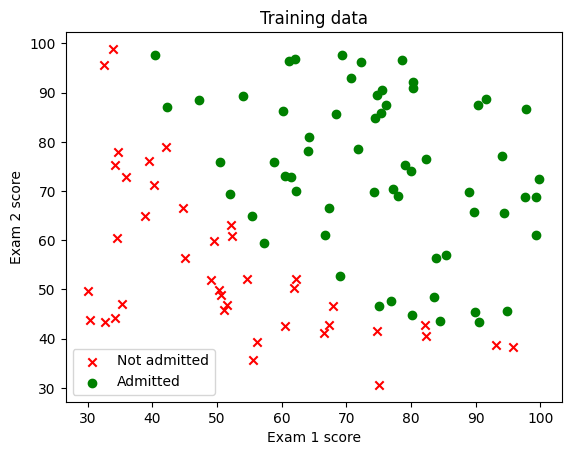

In [4]:
def plotData(X,Y):
    pos=[]                                                  # Admited - 1
    neg=[]                                                  # Denied - 0

    for i in range(0,Y.size):                               # Y is used to check whether the person has been admitted
        if Y[i] ==0:                                        # if not then the given elements of X go to neg
            neg.append(X[i,:])
        elif Y[i] ==1:                                      # if yes then the given elements of X go to pos
            pos.append(X[i,:])

    neg = np.array(neg)
    pos = np.array(pos)

    plt.scatter(neg[:,0],neg[:,1],marker='x',c="r", label="Not admitted")
    plt.scatter(pos[:,0],pos[:,1],marker='o',c="g", label="Admitted")
    plt.title("Training data")
    plt.xlabel("Exam 1 score")
    plt.ylabel("Exam 2 score")
    plt.legend(loc='lower left')
    plt.show()

    return pos, neg

pos,neg=plotData(X,Y)

You can see that the two categories are quite distinct.

### 4: Data preparation

To do a Mean normalization and Feature scaling an the Data set is always a good idea. If the features located near the origo and have the same amplitude it can speed up convergence. Also not to forget to add the BIAS.

##### Data normalization

In [5]:
def featureNormalization(X):
    ################### CODE HERE ########################
    # Implement the feature normalization function
    # Calculate the mean and standard deviation of the data
    # Normalize the X input data with the calculated variable

    # Calculate the mean and standard deviation of the data
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    # Normalize the X input data with the calculated variables
    X_norm = (X - mean) / std




    #####################################################
    return X_norm,mean,std

X,mean,std=featureNormalization(X)

#### Add bias to the X matrix

As we have done in the previous steps, we add a column of ones to the X matrix to preserve the axis intercept in our hypothesis (See L01 - L02).

In [6]:
def addBIAS(X):
    ################### CODE HERE ########################
    # Implemet the add BIAS function
    # Make sure the dimensions match

    # Create a column of ones with the same number of rows as X
    bias_column = np.ones((X.shape[0], 1))

    # Stack the bias column horizontally with X
    X_extended = np.column_stack((bias_column, X))


    #####################################################
    return X_extended

X = addBIAS(X)
print(X.shape)
print(X)

(100, 3)
[[ 1.         -1.60224763  0.63834112]
 [ 1.         -1.82625564 -1.2075414 ]
 [ 1.         -1.53903969  0.3612943 ]
 [ 1.         -0.28210129  1.0863683 ]
 [ 1.          0.69152826  0.49337794]
 [ 1.         -1.06199728 -0.5357394 ]
 [ 1.         -0.23437234  1.63818413]
 [ 1.          0.4845113  -1.06373024]
 [ 1.          0.53998666  1.14651105]
 [ 1.          0.97044832 -1.22709853]
 [ 1.          1.56075461 -1.51418452]
 [ 1.          0.48393864 -1.92641626]
 [ 1.          0.86065022  0.55490359]
 [ 1.          0.1921582   1.70347834]
 [ 1.         -1.34839922  0.53082781]
 [ 1.         -0.60293429  1.24314792]
 [ 1.          0.17694982 -0.72913975]
 [ 1.          0.11893077 -1.05699346]
 [ 1.          0.25914553  1.44433023]
 [ 1.          0.58543944 -1.00845873]
 [ 1.          0.0892403  -1.26468472]
 [ 1.          1.2413042  -0.02285779]
 [ 1.         -0.78042096 -0.93923898]
 [ 1.         -1.62350714 -1.19053019]
 [ 1.          0.63426559  0.14875155]
 [ 1.         -0

## 5: Model

Befor we jump into the solution of the task in hand let's think it throuh what kind of model is needed here and what have we used so far.

Since we are facing a classification problem, our linear regression model will not be fully adequate. Let's look at a simple example. We are trying to decide whether a tumour is lethal or not based on tumour size.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab03/Pics/L03_Tumor.png?raw=1" width="400">

If the method introduced so far is applied and fit a line using the following hypothesis.

$ h_w(x)=XW $

However, our line exceeds the range of [0,1] and is not precise enough. By then defining a limit for our fitted line, let it be 0.5, we can decide what our prediction will be.

If $h_w(x)\geq 0.5$, then "y=1", so it is lethal. <br>
If $h_w(x)< 0.5$, then "y=0", so it is not lethal.  <br>

However, our prediction may fall below 0 or above 1, which is unnecessary. It would be better to find a bounded hypothesis function that satisfies the following criterion.

$0\leq h_w(x) \leq 1$

Let us introduce the sigmoid function, which satisfies this criterion of being bounded on [0,1].

Sigmoid:

$ g(z) = \frac{1}{1+e^{-z}} $

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab03/Pics/L03_Sigmoid.png?raw=1" width="450">

Using the sigmoid function, we effectively assign a probability to each sample of the chance that the tumour size is lethal.

$h_w(x)=P(y=1|X, W)$

And we can extend our hypothesis as follows: <br>

$ h_w(x) = g(XW) $ <br>
, where $ g(XW) = \frac{1}{1+e^{-XW}} $

$g(XW)\geq0.5$ <br>
if $WX\geq0$

Let's look at two simple examples of classification using a sigmoid function. <br>

#### Linear case:

$ h_w(x)=g(w_01+w_1x_1+w_2x_2) $

$w=[-3\ 1\ 1]$

Prediction: $y=1$ ha $-3+x_1+x_2\geq0$

$x_1+x_2\geq3$

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab03/Pics/L03_pelda_1.png?raw=1" width="200">

#### Non-linear case:

$ h_w(x)=g(w_01+w_1x_1+w_2x_2+w_3x_1^2+w_4x_2^2) $

$w=[-1\ 0\ 0\ 1\ 1]$

Prediction: $y=1$ ha $-1+x_1^2+x_2^2\geq0$

$x_1^2+x_2^2\geq1$

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab03/Pics/L03_pelda_2.png?raw=1" width="200">

Let's create a sigmoid function then test it for the following values: -6, 0, 6

In [8]:
def sigmoid(z):
    ################### CODE HERE ########################
    # Implemet the sigmoid function

    g = 1 / (1 + np.exp(-z))

    #####################################################
    return g

print('Function return for value -6 : %.3f' % sigmoid(-6))           # test for -6
print('Function return for value  0 : %.3f' % sigmoid(0))            # test for 0
print('Function return for value  6 : %.3f' % sigmoid(6))            # test for 6

if sigmoid(-6) < 0.01 and sigmoid(0) == 0.5 and sigmoid(6) > 0.99:
    print("\n The sigmoid() function is good.")
else:
    print("\n Something wrong. Correct the sigmoid function!")

Function return for value -6 : 0.002
Function return for value  0 : 0.500
Function return for value  6 : 0.998

 The sigmoid() function is good.


### 6 Cost function
Since we have changed our hypothesis function, we need to change the cost function we have been using. To adapt it to the task. The MSE introduced in our previous examples provided a reasonably smooth convergence, with our modified hypothesis it is not the best choice for solving classification problems as it will result in a non-convex function with many local mininmum points. The question is: can we find a cost function that can define a convex cost function in classification problems? On a convex function, our gradient method is much less likely to get stuck at a local minimum point.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab03/Pics/L03_Costfunction.png?raw=1" width="600">

Let:

$ C(w) = {-log(h_w(x)),\   if \ y=1} $

$ C(w) = {-log(1-h_w(x)),\ if \ y=0} $

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab03/Pics/L03_LogCost.png?raw=1" width="300">

So we use the following relation as the cost function:

$ C(w) = \frac{1}{m} \sum{-y^i\cdot\log(h_w(x^i))-(1-y^i)\cdot\log(1-h_w(x^i))} $


### 7: Gradient Descent Algorithm
Our aim remains to minimise the cost function. Descending the gradient is still a workable way of truncating the weights using the derivative of the cost function.

$w_j:=w_j-\mu\frac{\partial}{\partial w_j}C(w)$

The partial derivative of the cost function can be calculated in the usual way:

$ \frac{\partial}{\partial w_j}C(w)=\frac{1}{m}\sum_{i=1}^{m}(h_w(x^i)-y^i)\cdot x_j^i $


### Define the costFunction

Write the definition of costFunction and test it with two values of w.

In [9]:
def costFunction(w,X,Y):
    ################### CODE HERE ########################
    # Implement the cost function calculation for a logistic regression task
    m = len(Y)  # Number of training examples

    # Calculate the hypothesis (predictions)
    h = sigmoid(np.dot(X, w))

    # Calculate the cost
    C = (-1 / m) * np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h))

    # Calculate the gradient
    grad = (1 / m) * np.dot(X.T, (h - Y))





    ####################################################
    return C, grad

In [10]:
initial_w = np.zeros(((n+1),1))                                             # initial weights (null vector)
C1,grad1 = costFunction(initial_w,X,Y)                                      # test the cost function

print('''Cost and Gradient at initial weights (zeros):
Expected cost (approx.): 0.693
Computed:''',C1)
print('''Expected gradient(approx.):
 [[-0.1]
 [-0.28]
 [-0.25]]
Computed:\n''',grad1)

test_w = np.array([[-24], [13], [16]])                                    # test weights [-24;0.2;0.2]
C2, grad2 = costFunction(test_w,X,Y)                                      # test the cost function
print('\nTest weights:',test_w.transpose())
print('''Cost and Gradient  at test weights:
Expected cost (approx.): 7.74
Computed:''',C2)
print('''Expected gradient(approx.):
 [[-0.44]
 [-0.14]
 [-0.06]]
Computed:\n''',grad2)
print('\n')

Cost and Gradient at initial weights (zeros):
Expected cost (approx.): 0.693
Computed: 0.6931471805599453
Expected gradient(approx.):
 [[-0.1]
 [-0.28]
 [-0.25]]
Computed:
 [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]

Test weights: [[-24  13  16]]
Cost and Gradient  at test weights:
Expected cost (approx.): 7.74
Computed: 7.733307911943509
Expected gradient(approx.):
 [[-0.44]
 [-0.14]
 [-0.06]]
Computed:
 [[-0.43950263]
 [-0.14278618]
 [-0.06318899]]




### 8: Definition of the Gradient Descent Method

We run the algorithm up to a certain number of iterations in the following test for better visualization.

In [11]:
def gradientDescent(X,Y,w,learning_rate,num_iters):
    C_history = []
    ################### CODE HERE ########################
    # Implement the Gradient Descent algorithm
    m = len(Y)  # Number of training examples
    C_history = []

    for i in range(num_iters):
        # Calculate the cost and gradient
        C, grad = costFunction(w, X, Y)

        # Update the weights
        w = w - learning_rate * grad

        # Store the cost for this iteration
        C_history.append(C)





    ####################################################
    return w, np.array(C_history)

### 9: Trying out the gradient descent method for multiple learning rates

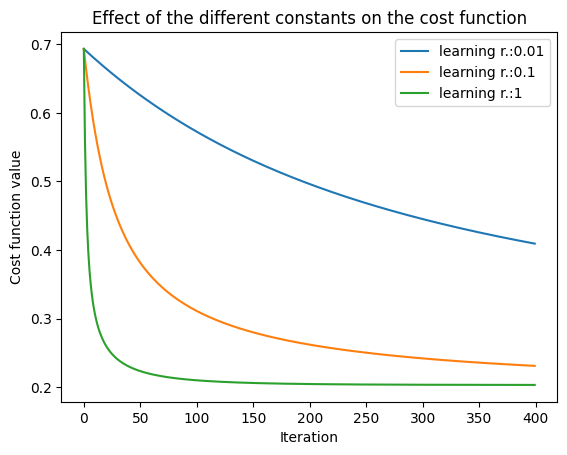

In [12]:
w = np.array([[0],[0],[0]])     # initial weights
epoch = 400

w_a, C_history_a = gradientDescent(X,Y,w,0.01,epoch)
plt.plot(range(C_history_a.size), C_history_a, label= "learning r.:0.01")

w_b, C_history_b = gradientDescent(X,Y,w,0.1, epoch)
plt.plot(range(C_history_b.size), C_history_b, label= "learning r.:0.1")

w, C_history = gradientDescent(X,Y,w,1,epoch)
plt.plot(range(C_history.size), C_history, label= "learning r.:1")

plt.title("Effect of the different constants on the cost function")
plt.xlabel("Iteration")
plt.ylabel("Cost function value")
plt.legend()
plt.show()

The graph above shows how the learning rate affected our results:<br>
When the learning rate $(\mu)$ is chosen to be small, convergence is slow. <br>
As the learning rate $(\mu)$ increases, convergence accelerates.<br>

In [13]:
print('''The cost function at found weights by the gradient descent alg.:
Expected (approx): 0.203
Computed: %.04f''' % C_history[-1])
print('''Weights expected (approx.):
[1.658 3.883 3.619]
Weights computed: \n''', w.transpose())

The cost function at found weights by the gradient descent alg.:
Expected (approx): 0.203
Computed: 0.2036
Weights expected (approx.):
[1.658 3.883 3.619]
Weights computed: 
 [[1.65947664 3.8670477  3.60347302]]


### 9: Visualization of the decision limit

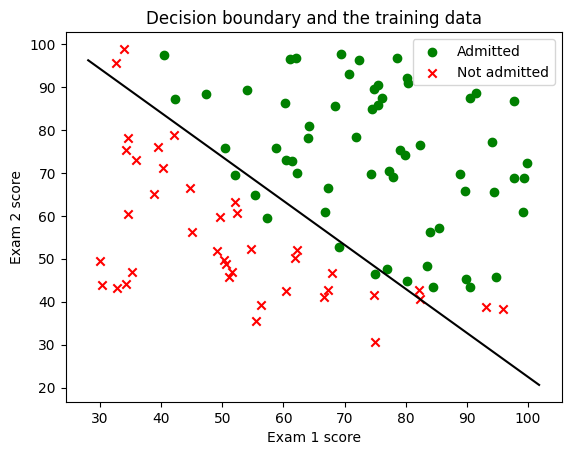

In [14]:
plt.scatter(pos[:,0],pos[:,1],c="g", marker="o",label="Admitted")
plt.scatter(neg[:,0],neg[:,1],c="r",marker="x",label="Not admitted")

Exam1_val     = np.array([min(X_original[:, 0])-2, max(X_original[:, 0]+2)])  # add two x values to the decision limit
Exam1_norm = (Exam1_val - mean[0]) / std[0]
Exam2_norm = (-w[0]-w[1]*Exam1_norm)/w[2]                                     # calculate the corresponding y
Exam2_val     = (Exam2_norm * std[1]) + mean[1]

plt.plot(Exam1_val,Exam2_val,"k")                                             # draw the decision boundary in black
plt.title("Decision boundary and the training data")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)
plt.show()

### 10: Prediction
When calculating the prediction, we have to make sure that we perform the same operations on the sample as we did in the data preparation phase before the training. So if we have normalised our data, we must also normalise the new data and add the BIAS. Then we can use our saved weight vector to calculate our prediction.

In [18]:
def predict(X):
    ################### CODE HERE ########################
    # Implement the prediction function.
    # First normalize the data with the previously calculated mean and std
    # Do not forget to add the BIAS
    # Using a sigmoid function you can calculate the classification for each X

    # Normalize the data
    X_norm = (X - mean) / std

    # Reshape X_norm to a 2D array if it's 1D
    # The current reshaping might be incorrect when called with X_original in calculateAccuracy
    #X_norm = X_norm.reshape(1, -1)
    # Fixed Reshape: ensures X_norm remains 2D with the correct number of features.
    if X_norm.ndim == 1:  # If X_norm is 1D, reshape to 2D
        X_norm = X_norm.reshape(1, -1)

    # Add bias term
    X_norm = np.column_stack((np.ones(X_norm.shape[0]), X_norm))

    # Calculate the predicted probabilities
    h = sigmoid(np.dot(X_norm, w))

    # Convert probabilities to class labels (0 or 1)
    p = (h >= 0.5).astype(int)




    ######################################################
    return p, h

NewScore = np.array([45,85])
pred, h =predict(NewScore)
print('''Expected result of the prediction with [45 , 85] (approx.):
Accepted (1) with 0.767 possibility
Predicted: %.0f with %.4f possibility''' % (pred, h[0]))

Expected result of the prediction with [45 , 85] (approx.):
Accepted (1) with 0.767 possibility
Predicted: 1 with 0.7678 possibility


<ipython-input-18-3d4b08c71073>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('''Expected result of the prediction with [45 , 85] (approx.):


### 11: Accuracy
Let's examine how our linear model performs when evaluating the original data. Calculate the accuracy of the algorithm. To do this, we can use the predict() function written earlier or we can evaluate all the samples in a batch.

In [21]:
def calculateAccuracy():
    ################### CODE HERE ########################
    # Implement the accuracy calculation function.
    # Calculate the prediction for each original X.
    # If it is greater than 0.5 then positive otherwise negative.
    # Compare the result with the elements of Y.
    # And finally calculate a percentage to reflect the accuracy.

    # Get predictions for the original data
    predictions, _ = predict(X_original)  # Get predictions for original data

    # Compare predictions with true labels (Y) and count correct predictions
    correct_predictions = np.sum(predictions == Y)

    # Calculate accuracy percentage
    accuracy = (correct_predictions / len(Y)) * 100

    ######################################################
    return accuracy # Return the scalar value directly


print(float(calculateAccuracy()), '% accuracy (approx. 89.0 % expected)')

89.0 % accuracy (approx. 89.0 % expected)


## Implementation with high level packages

In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('Lab3data.txt', header = None)

XX = data.iloc[:, 0:2].values.reshape(-1, 2)            # Separation of data
YY = data.iloc[:, 2].values.reshape(-1,)                # LogReg fits to a 1d array

logReg = LogisticRegression().fit(XX,YY)
test = np.array([[45, 85]])
pred = logReg.predict(test)                             # prediction
pred_p = logReg.predict_proba(test)                     # probability of the prediction

print("""Prediction for the approval:""",int(pred[0]),"""
The value of the probability:""",pred_p[0,1])

acc = logReg.score(XX,YY)                               # calculate accuracy
print('Accuracy on the training data:',acc)

Prediction for the approval: 1 
The value of the probability: 0.7752856046030867
Accuracy on the training data: 0.89


<div style="text-align: right">This lab exercise uses elements from Andrew Ng's Machine Learning course.</div>